In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score, accuracy_score, mean_absolute_error, cohen_kappa_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, randint
from sklearn.neighbors import NearestNeighbors
import plotly.express as px




In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [5]:
X = df.drop(["Air Quality"], axis=1)
y = df["Air Quality"]

In [6]:
correlation_matrix = X.corr()
print(correlation_matrix)

                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                          0.333004  0.299582 

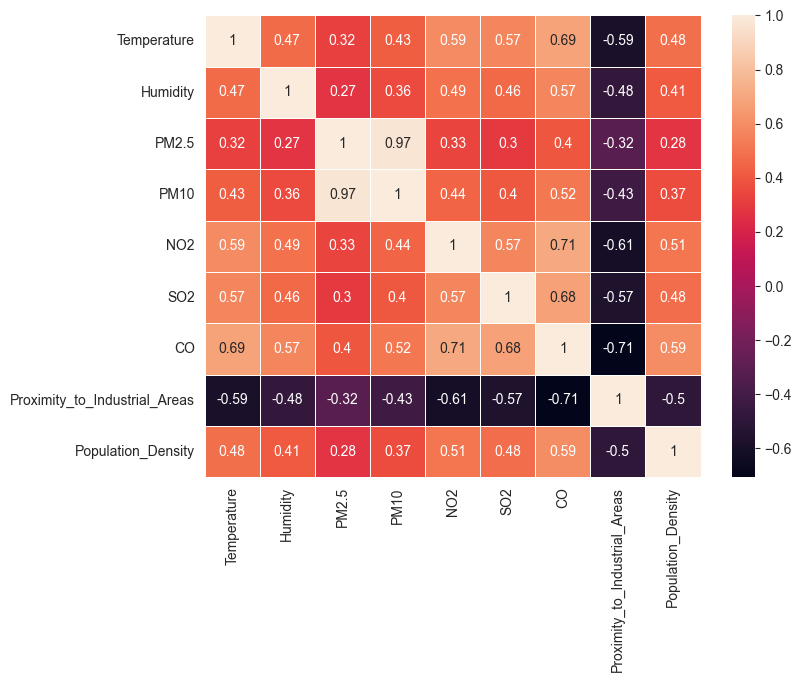

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=.7)
plt.show()

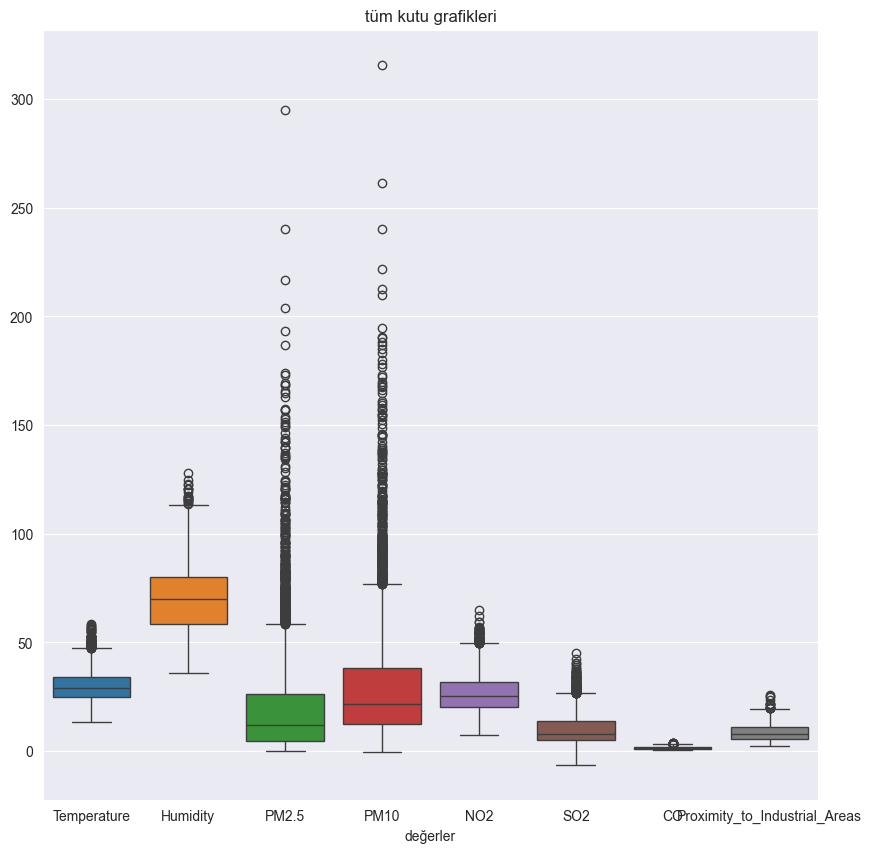

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Temperature", "Humidity", "PM2.5", "PM10" , "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas"]])
plt.title("tüm kutu grafikleri")
plt.xlabel("değerler")
plt.show()

In [9]:
target_counts = y.value_counts()
print(target_counts)
print(target_counts / len(df) * 100)  # Yüzdelik dağılım


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: count, dtype: float64


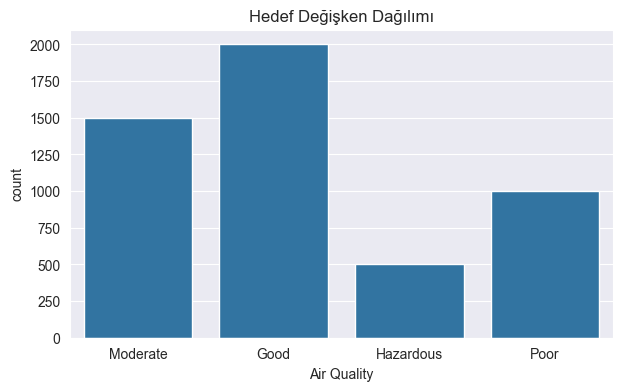

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Air Quality')
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [11]:
quality = [['Hazardous', 'Poor', 'Moderate', 'Good']]

In [12]:
y_ordinal = OrdinalEncoder(categories=quality)
y = y_ordinal.fit_transform(df[["Air Quality"]])

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917


In [16]:
#outlier_mask = (np.abs(X_scaled) > 6).any(axis=1)
combined_mask = ((np.abs(X_scaled) > 3).any(axis=1)) # | mask_2 | mask_3
X_scaled = X_scaled[~combined_mask]
y = y[~combined_mask]


In [17]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [18]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_scaled_df, y)

In [19]:
print(x_balanced)
print("İlk 20 eleman:", y_balanced[:20])

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0       -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1       -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2       -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3       -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4       -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   
...           ...       ...       ...       ...       ...       ...       ...   
7931    -0.576199  1.208008 -0.647275 -0.807509 -0.927358  0.029738  0.210897   
7932    -0.406710 -1.278147  0.656440  0.559071 -0.195280  0.061115 -0.196835   
7933     0.162992 -0.214906 -0.561970 -0.510742  0.292931 -0.573799 -0.162027   
7934    -0.135305 -0.045789 -0.109613  0.030830 -0.827133  0.085990 -0.413708   
7935    -0.549620  0.069773 -0.172878 -0.141017 -0.111480 -0.280941  0.827333   

      Proximity_to_Industri

In [20]:
lda = LDA(n_components=3)
X_reduced = lda.fit_transform(x_balanced, y_balanced.ravel())

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)

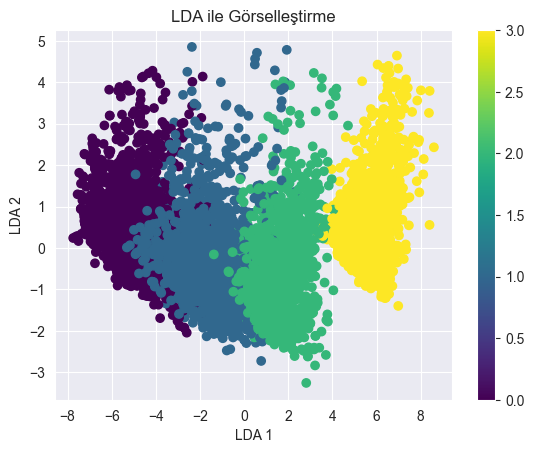

In [22]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_balanced, cmap='viridis')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA ile Görselleştirme')
plt.colorbar()
plt.show()

In [23]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_reduced[:, 0],
    'tsne2': X_reduced[:, 1],
    'tsne3': X_reduced[:, 2],
    'label': y_balanced
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=y_balanced,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)

fig.write_image("3d_tsne_gorseli.png")


fig.show()

LOGISTIC REGRESSION

In [24]:
param_grid =[ {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['saga']
},
{'estimator__C': [0.01, 0.1, 1, 10, 100],
     'estimator__penalty': ['elasticnet'],
     'estimator__solver': ['saga'],
     'estimator__l1_ratio': [0.2, 0.5, 0.8]} ]

reg = OneVsRestClassifier(LogisticRegression(max_iter=5000))
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,OneVsRestClas...ax_iter=5000))
,param_grid,"[{'estimator__C': [0.01, 0.1, ...], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['saga']}, {'estimator__C': [0.01, 0.1, ...], 'estimator__l1_ratio': [0.2, 0.5, ...], 'estimator__penalty': ['elasticnet'], 'estimator__solver': ['saga']}]"
,scoring,'roc_auc_ovr'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [25]:
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi ROC AUC skoru:", grid_search.best_score_)

# En iyi modeli kullanın
model = grid_search.best_estimator_

En iyi hiperparametreler: {'estimator__C': 0.01, 'estimator__l1_ratio': 0.8, 'estimator__penalty': 'elasticnet', 'estimator__solver': 'saga'}
En iyi ROC AUC skoru: 0.9638729991799015


In [26]:
#PREDICT
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train_lr = model.predict_proba(X_train)
y_pred_proba_test_lr = model.predict_proba(X_test)

In [27]:
train_accuracy = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy_lr:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8582
Test Verisi Doğruluğu (Testing Accuracy): 0.8558


In [28]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train_lr, multi_class='ovr')
test_roc_auc_lr = roc_auc_score(y_test, y_pred_proba_test_lr, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc_lr:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9641
Test Verisi ROC AUC Skoru: 0.9644


In [29]:
print("\n--- Sınıflandırma Raporu ---")
cl_lr = classification_report(y_test, y_pred_test_lr)
print(cl_lr)


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       348
         1.0       0.83      0.64      0.72       422
         2.0       0.80      0.87      0.84       390
         3.0       0.96      1.00      0.98       428

    accuracy                           0.86      1588
   macro avg       0.85      0.86      0.85      1588
weighted avg       0.86      0.86      0.85      1588



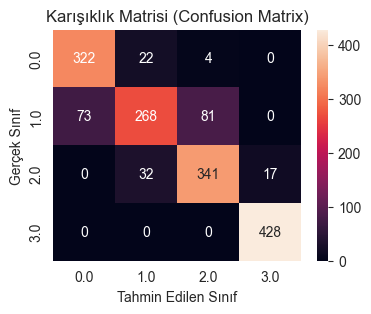

In [30]:
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [31]:
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"MAE: {mae_lr:.4f}")

MAE: 0.1467


Decision Tree

In [32]:
tree = DecisionTreeClassifier(random_state=42)
model = tree.fit(X_train, y_train)

param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None]
}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)


In [33]:
model_tree = grid_search.fit(X_train, y_train)


In [34]:
print("--- Grid Search for Decision Tree ---")
print(f"En İyi Parametreler: {model_tree.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_tree.best_score_:.4f}")


--- Grid Search for Decision Tree ---
En İyi Parametreler: {'max_depth': 5}
En İyi ROC AUC Skoru: 0.9829


In [35]:
model = model_tree.best_estimator_

In [36]:
y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

y_pred_proba_train_dt = model.predict_proba(X_train)
y_pred_proba_test_dt = model.predict_proba(X_test)

In [37]:
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy_dt:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8582
Test Verisi Doğruluğu (Testing Accuracy): 0.9270


In [38]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train_dt, multi_class='ovr')
test_roc_auc_dt = roc_auc_score(y_test, y_pred_proba_test_dt, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc_dt:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9876
Test Verisi ROC AUC Skoru: 0.9823


In [39]:
print("\n--- Sınıflandırma Raporu ---")
cr_dt = classification_report(y_test, y_pred_test_dt)
print(cr_dt)


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       348
         1.0       0.89      0.84      0.87       422
         2.0       0.94      0.97      0.95       390
         3.0       1.00      0.99      0.99       428

    accuracy                           0.93      1588
   macro avg       0.92      0.93      0.93      1588
weighted avg       0.93      0.93      0.93      1588



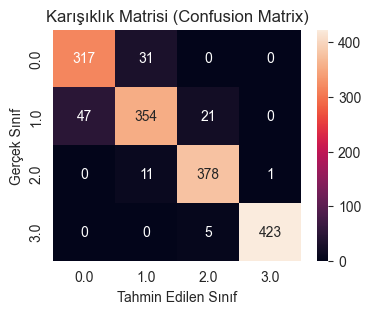

In [40]:
cm_dt = confusion_matrix(y_test, y_pred_test_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [41]:
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)

print(f"MAE: {mae_dt:.4f}")

MAE: 0.0730


RANDOM FOREST

In [42]:
rf = RandomForestClassifier(random_state=42)

In [43]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
}

In [44]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc_ovr', n_jobs=-1)

In [45]:
model_rf = grid_search_rf.fit(X_train, y_train)

In [46]:
print("--- Rastgele Orman için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_rf.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_rf.best_score_:.4f}")

--- Rastgele Orman için Grid Search Sonuçları ---
En İyi Parametreler: {'max_depth': 15, 'n_estimators': 300}
En İyi ROC AUC Skoru: 0.9905


In [47]:
model = model_rf.best_estimator_


In [48]:
y_pred_train_rf = model.predict(X_train)
y_pred_test_rf = model.predict(X_test)

y_pred_proba_train_rf = model.predict_proba(X_train)
y_pred_proba_test_rf = model.predict_proba(X_test)

In [49]:
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy_rf:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.9968
Test Verisi Doğruluğu (Testing Accuracy): 0.9395


In [50]:
train_roc_auc_rf = roc_auc_score(y_train, y_pred_proba_train_rf, multi_class='ovr')
test_roc_auc_rf = roc_auc_score(y_test, y_pred_proba_test_rf, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc_rf:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc_rf:.4f}")

Eğitim Verisi ROC AUC Skoru: 1.0000
Test Verisi ROC AUC Skoru: 0.9908


In [51]:
print("\n--- Sınıflandırma Raporu ---")
cr_rf = classification_report(y_test, y_pred_test_rf)
print(cr_rf)


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       348
         1.0       0.91      0.87      0.89       422
         2.0       0.94      0.97      0.96       390
         3.0       1.00      1.00      1.00       428

    accuracy                           0.94      1588
   macro avg       0.94      0.94      0.94      1588
weighted avg       0.94      0.94      0.94      1588



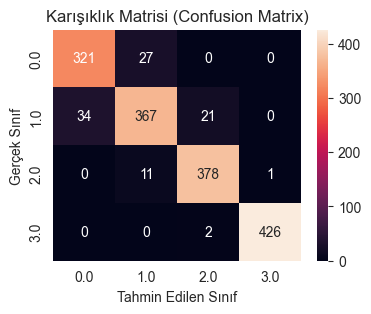

In [52]:
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [53]:
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)

print(f"MAE: {mae_rf:.4f}")

MAE: 0.0605


SVM(SVC)

In [54]:
svc_model = OneVsRestClassifier(SVC(probability=True, random_state=42))

In [55]:
param_distributions_svc = {
    'estimator__C': reciprocal(0.01, 1000),
    'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [56]:
random_search_svc = RandomizedSearchCV(svc_model, param_distributions_svc, n_iter=10 ,cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [57]:
model_sv = random_search_svc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("--- SVC için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_sv.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_sv.best_score_:.4f}")

In [ ]:
model = model_sv.best_estimator_

In [ ]:
#PREDICT
y_pred_train_svc = model.predict(X_train)
y_pred_test_svc = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train_svc = model.predict_proba(X_train)
y_pred_proba_test_svc = model.predict_proba(X_test)

In [ ]:
train_accuracy_svc = accuracy_score(y_train, y_pred_train_svc)
test_accuracy_svc = accuracy_score(y_test, y_pred_test_svc)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy_svc:.4f}")

In [ ]:
train_roc_auc_svc = roc_auc_score(y_train, y_pred_proba_train_svc, multi_class='ovr')
test_roc_auc_svc = roc_auc_score(y_test, y_pred_proba_test_svc, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc_svc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc_svc:.4f}")

In [ ]:
print("\n--- Sınıflandırma Raporu ---")
cr_svc = classification_report(y_test, y_pred_test_svc)
print(cr_svc)

In [ ]:
mae_svc = mean_absolute_error(y_test, y_pred_test_svc)

print(f"MAE: {mae_svc:.4f}")

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_test_svc)
plt.figure(figsize=(4,3))
sns.heatmap(cm_svc, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

KNN

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
param_distributions_knn = {
    'n_neighbors': randint(1, 21),  # 1'den 20'ye kadar rastgele bir sayı seç
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [ ]:
random_search_knn = RandomizedSearchCV(knn_model, param_distributions_knn, n_iter=50, cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [ ]:
model = random_search_knn.fit(X_train, y_train)

In [ ]:
print("--- KNN için Randomized Search Sonuçları ---")
print(f"En İyi Parametreler: {model.best_params_}")
print(f"En İyi ROC AUC Skoru: {model.best_score_:.4f}")

In [ ]:
best_knn_model = model.best_estimator_

In [ ]:
y_pred_train_knn = best_knn_model.predict(X_train)
y_pred_test_knn = best_knn_model.predict(X_test)
y_pred_proba_train_knn = best_knn_model.predict_proba(X_train)
y_pred_proba_test_knn = best_knn_model.predict_proba(X_test)

In [ ]:
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
print(f"\nEğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy_knn:.4f}")

In [ ]:
train_roc_auc_knn = roc_auc_score(y_train, y_pred_proba_train_knn, multi_class='ovr')
test_roc_auc_knn = roc_auc_score(y_test, y_pred_proba_test_knn, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc_knn:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc_knn:.4f}")

In [ ]:
print("\n--- Sınıflandırma Raporu ---")
cr_knn = classification_report(y_test, y_pred_test_knn)
print(cr_knn)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(4,3))
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [ ]:
mae_knn = mean_absolute_error(y_test, y_pred_test_knn)

print(f"MAE: {mae_knn:.4f}")

KMEANS

In [ ]:
#elbow metodu
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(1, 11), wcss, marker="o")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_train)

# LDA ile görselleştirme
lda_vis = LDA(n_components=3)
X_vis = lda_vis.fit_transform(X_train, y_train.ravel())


In [ ]:
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (LDA 2D)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.show()

In [ ]:
skor_kmeans = silhouette_score(X_train, clusters_kmeans)
print(skor_kmeans)

In [ ]:
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_train)

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (t-SNE)")
plt.show()

In [ ]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=clusters_kmeans,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

DBSCAN

In [ ]:
min_samples = X_train.shape[1] + 1
print(min_samples)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)

In [ ]:
distances = np.sort(distances[:, -1])

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Noktalar (sıralı)")
plt.ylabel(f"{min_samples}. komşuya uzaklık")
plt.title("k-distance graph (Elbow yöntemi ile eps seçimi)")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.55, min_samples=6)
clusters = dbscan.fit_predict(X_train)

In [ ]:
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (LDA 2D)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.show()

In [ ]:
skor_dbscan = silhouette_score(X_train, clusters)
print(skor_dbscan)

In [ ]:
#TSNE GÖRSELLEŞTİRME
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (t-SNE)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# Classification Results Table
classification_results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Test_Accuracy': [test_accuracy_lr, test_accuracy_dt, test_accuracy_rf, test_accuracy_svc, test_accuracy_knn],
    'Test_ROC_AUC': [test_roc_auc_lr, test_roc_auc_dt, test_roc_auc_rf, test_roc_auc_svc, test_roc_auc_knn],
    'Test_MAE': [mae_lr, mae_dt, mae_rf, mae_svc, mae_knn],
    'Test_F1_Macro': [
        f1_score(y_test, y_pred_test_lr, average='macro'),
        f1_score(y_test, y_pred_test_dt, average='macro'),
        f1_score(y_test, y_pred_test_rf, average='macro'),
        f1_score(y_test, y_pred_test_svc, average='macro'),
        f1_score(y_test, y_pred_test_knn, average='macro')
    ],
    'Test_F1_Weighted': [
        f1_score(y_test, y_pred_test_lr, average='weighted'),
        f1_score(y_test, y_pred_test_dt, average='weighted'),
        f1_score(y_test, y_pred_test_rf, average='weighted'),
        f1_score(y_test, y_pred_test_svc, average='weighted'),
        f1_score(y_test, y_pred_test_knn, average='weighted')
    ],
    'Test_Precision_Macro': [
        precision_score(y_test, y_pred_test_lr, average='macro'),
        precision_score(y_test, y_pred_test_dt, average='macro'),
        precision_score(y_test, y_pred_test_rf, average='macro'),
        precision_score(y_test, y_pred_test_svc, average='macro'),
        precision_score(y_test, y_pred_test_knn, average='macro')
    ],
    'Test_Recall_Macro': [
        recall_score(y_test, y_pred_test_lr, average='macro'),
        recall_score(y_test, y_pred_test_dt, average='macro'),
        recall_score(y_test, y_pred_test_rf, average='macro'),
        recall_score(y_test, y_pred_test_svc, average='macro'),
        recall_score(y_test, y_pred_test_knn, average='macro')
    ]
}

classification_df = pd.DataFrame(classification_results)
classification_df = classification_df.round(4)

print("=== CLASSIFICATION RESULTS ===")
print(classification_df.to_string(index=False))

# Clustering Results Table
clustering_results = {
    'Clustering_Method': ['KMeans', 'DBSCAN', 'HDBSCAN'],
    'Silhouette_Score': [skor_kmeans, skor_dbscan],
    'Number_of_Clusters': [
        len(np.unique(clusters_kmeans)),
        len(np.unique(clusters)) - (1 if -1 in clusters else 0),  # DBSCAN noise points
    ],
    'Noise_Points': [
        0,  # KMeans doesn't have noise points
        np.sum(clusters == -1),  # DBSCAN noise points
    ]
}

clustering_df = pd.DataFrame(clustering_results)
clustering_df = clustering_df.round(4)

print("\n=== CLUSTERING RESULTS ===")
print(clustering_df.to_string(index=False))

# Combined Summary
print("\n=== BEST PERFORMERS ===")
best_accuracy = classification_df.loc[classification_df['Test_Accuracy'].idxmax(), 'Model']
best_roc_auc = classification_df.loc[classification_df['Test_ROC_AUC'].idxmax(), 'Model']
best_mae = classification_df.loc[classification_df['Test_MAE'].idxmin(), 'Model']
best_f1 = classification_df.loc[classification_df['Test_F1_Weighted'].idxmax(), 'Model']
best_clustering = clustering_df.loc[clustering_df['Silhouette_Score'].idxmax(), 'Clustering_Method']

print(f"Best Accuracy: {best_accuracy} ({classification_df['Test_Accuracy'].max():.4f})")
print(f"Best ROC-AUC: {best_roc_auc} ({classification_df['Test_ROC_AUC'].max():.4f})")
print(f"Best MAE: {best_mae} ({classification_df['Test_MAE'].min():.4f})")
print(f"Best F1-Score: {best_f1} ({classification_df['Test_F1_Weighted'].max():.4f})")
print(f"Best Clustering: {best_clustering} ({clustering_df['Silhouette_Score'].max():.4f})")

